## Importing Libraries


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import seaborn as sns

import pandas as pd


import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

## Loading Dataset

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/dataset.csv")
dataset.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

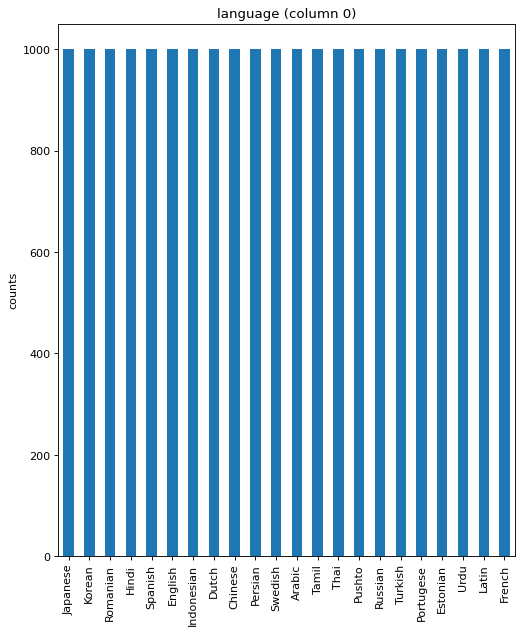

In [ ]:
plotPerColumnDistribution(dataset, 10, 5)

## Data Preprocessing
this will be doing following:
*   Splitting X and Y
*   Encoding Y
*   Cleaning and Lowering Text







In [ ]:
# Splitting X and Y
x,y = dataset["Text"],dataset["language"]

# Encoding Y 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(y[:10])

[ 4 17 19 18  2  8 20 10 21  8]


In [ ]:
print(len(np.unique(y)))

22


In [ ]:
# Cleaning and lowering text
def cleanLower(texts):
    
    # This regular expression pattern means everything except alphabetical characters
    pattern = "^[a-zA-Z]"
    cleanText = []
    for text in texts:
        # re.sub(pattern) means replace everything with a space except alphabetical characters
        cleanText.append(re.sub(pattern," ",text).lower())
        
    return cleanText

x = cleanLower(x)
x[:4]

[' lement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald',
 ' ebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris ',
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม',
 'விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார்  ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார்  கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களு

## test train splitting

In [ ]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size=0.20, random_state=5)

print('lenght of training data = ',len(train_features))
print('lenght of test data = ', len(test_features))

lenght of training data =  17600
lenght of test data =  4400


## Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import*
from sklearn                         import preprocessing
from sklearn.preprocessing           import LabelEncoder

#uni gram
uni_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_uni = uni_vector.fit_transform(train_features)

#bigram
bi_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(2,2), max_features=1000)
bag_of_words_bi = bi_vector.fit_transform(train_features)

#trigram
tri_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_tri = tri_vector.fit_transform(train_features)

#3chargram
char3_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_char3 = char3_vector.fit_transform(train_features)

#4chargram
char4_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(4,4), max_features=1000)
bag_of_words_char4 = char4_vector.fit_transform(train_features)

#5chargram
char5_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(5,5), max_features=1000)
bag_of_words_char5 = char5_vector.fit_transform(train_features)

#6chargram
char6_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(6,6), max_features=1000)
bag_of_words_char6 = char6_vector.fit_transform(train_features)

#7chargram
char7_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(7,7), max_features=1000)
bag_of_words_char7 = char7_vector.fit_transform(train_features)

#8chargram
char8_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_char8 = char8_vector.fit_transform(train_features)

#9chargram
char9_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(9,9), max_features=1000)
bag_of_words_char9 = char9_vector.fit_transform(train_features)

#10chargram
char10_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(10,10), max_features=1000)
bag_of_words_char10 = char10_vector.fit_transform(train_features)

In [ ]:
# Get feature names
uni_feature_names = uni_vector.get_feature_names()
bi_feature_names = bi_vector.get_feature_names()
tri_feature_names = tri_vector.get_feature_names()
char3_feature_names = char3_vector.get_feature_names()
char4_feature_names = char4_vector.get_feature_names()
char5_feature_names = char5_vector.get_feature_names()
char6_feature_names = char6_vector.get_feature_names()
char7_feature_names = char7_vector.get_feature_names()
char8_feature_names = char8_vector.get_feature_names()
char9_feature_names = char9_vector.get_feature_names()
char10_feature_names = char10_vector.get_feature_names()



In [ ]:
uni_train_features=pd.DataFrame(bag_of_words_uni.toarray(), columns=uni_feature_names)
uni_train_features[:5]

,a,aan,aasta,aastal,ab,ac,ad,ada,adalah,after,akan,al,album,all,als,also,american,an,and,anno,ano,anos,ao,april,apud,ar,are,arsmedeltemperaturen,arsnederbord,as,at,atau,ate,att,au,augusti,aux,av,avec,b,...,ยวก,ร,ล,ว,ส,หร,อ,เก,เป,เพ,เม,เร,และ,ๆ,것을,그,그는,그러나,그리고,그의,년,된다,등,때,또한,수,월,위해,이,이후,일,있는,있다,자신의,한다,함께,また,年,年月日,月日
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bi_train_features=pd.DataFrame(bag_of_words_bi.toarray(), columns=bi_feature_names)
tri_train_features=pd.DataFrame(bag_of_words_tri.toarray(), columns=tri_feature_names)
char3_train_features=pd.DataFrame(bag_of_words_char3.toarray(), columns=char3_feature_names)
char4_train_features=pd.DataFrame(bag_of_words_char4.toarray(), columns=char4_feature_names)
char5_train_features=pd.DataFrame(bag_of_words_char5.toarray(), columns=char5_feature_names)
char6_train_features=pd.DataFrame(bag_of_words_char6.toarray(), columns=char6_feature_names)
char7_train_features=pd.DataFrame(bag_of_words_char7.toarray(), columns=char7_feature_names)
char8_train_features=pd.DataFrame(bag_of_words_char8.toarray(), columns=char8_feature_names)
char9_train_features=pd.DataFrame(bag_of_words_char9.toarray(), columns=char9_feature_names)
char10_train_features=pd.DataFrame(bag_of_words_char10.toarray(), columns=char10_feature_names)

## training data on ml models


*   Random Forest
*   Linear SVC
*   Logistic Regression





In [ ]:
from sklearn.ensemble                import RandomForestClassifier

#apply RandomForestClassifier on train dataset
rfc_uni = RandomForestClassifier()                      
rfc_uni.fit(uni_train_features, train_labels);

rfc_bi = RandomForestClassifier()                      
rfc_bi.fit(bi_train_features, train_labels);

rfc_tri = RandomForestClassifier()                      
rfc_tri.fit(tri_train_features, train_labels);

rfc_char3 = RandomForestClassifier()                      
rfc_char3.fit(char3_train_features, train_labels);

rfc_char4 = RandomForestClassifier()                      
rfc_char4.fit(char4_train_features, train_labels);

rfc_char5 = RandomForestClassifier()                      
rfc_char5.fit(char5_train_features, train_labels);

rfc_char6 = RandomForestClassifier()                      
rfc_char6.fit(char6_train_features, train_labels);

rfc_char7 = RandomForestClassifier()                      
rfc_char7.fit(char7_train_features, train_labels);

rfc_char8 = RandomForestClassifier()                      
rfc_char8.fit(char8_train_features, train_labels);

rfc_char9 = RandomForestClassifier()                      
rfc_char9.fit(char9_train_features, train_labels);

rfc_char10 = RandomForestClassifier()                      
rfc_char10.fit(char10_train_features, train_labels);

In [ ]:
from sklearn.svm                     import LinearSVC
#apply LinearSVC() on train dataset
lsvc_uni = LinearSVC()                      
lsvc_uni.fit(uni_train_features, train_labels);

lsvc_bi = LinearSVC()                      
lsvc_bi.fit(bi_train_features, train_labels);

lsvc_tri = LinearSVC()                      
lsvc_tri.fit(tri_train_features, train_labels);

lsvc_char3 = LinearSVC()                     
lsvc_char3.fit(char3_train_features, train_labels);

lsvc_char4 = LinearSVC()                     
lsvc_char4.fit(char4_train_features, train_labels);

lsvc_char5 = LinearSVC()                     
lsvc_char5.fit(char5_train_features, train_labels);

lsvc_char6 = LinearSVC()                     
lsvc_char6.fit(char6_train_features, train_labels);

lsvc_char7 = LinearSVC()                     
lsvc_char7.fit(char7_train_features, train_labels);

lsvc_char8 = LinearSVC()                     
lsvc_char8.fit(char8_train_features, train_labels);

lsvc_char9 = LinearSVC()                     
lsvc_char9.fit(char9_train_features, train_labels);

lsvc_char10 = LinearSVC()                     
lsvc_char10.fit(char10_train_features, train_labels);

In [ ]:
from sklearn.linear_model            import LogisticRegression
#apply LogisticRegression() on train dataset
lr_uni = LogisticRegression()                      
lr_uni.fit(uni_train_features, train_labels);

lr_bi = LogisticRegression()                      
lr_bi.fit(bi_train_features, train_labels);

lr_tri = LogisticRegression()                      
lr_tri.fit(tri_train_features, train_labels);

lr_char3 = LogisticRegression()                     
lr_char3.fit(char3_train_features, train_labels);

lr_char4 = LogisticRegression()                     
lr_char4.fit(char4_train_features, train_labels);

lr_char5 = LogisticRegression()                     
lr_char5.fit(char5_train_features, train_labels);

lr_char6 = LogisticRegression()                     
lr_char6.fit(char6_train_features, train_labels);

lr_char7 = LogisticRegression()                     
lr_char7.fit(char7_train_features, train_labels);

lr_char8 = LogisticRegression()                     
lr_char8.fit(char8_train_features, train_labels);

lr_char9 = LogisticRegression()                     
lr_char9.fit(char9_train_features, train_labels);

lr_char10 = LogisticRegression()                     
lr_char10.fit(char10_train_features, train_labels);

## testing  model

In [18]:
uni_test_features = uni_vector.transform(test_features)
uni_test_features=pd.DataFrame(uni_test_features.toarray(), columns=uni_feature_names)
uni_test_features[:5]

,a,aan,aasta,aastal,ab,ac,ad,ada,adalah,after,akan,al,album,all,als,also,american,an,and,anno,ano,anos,ao,april,apud,ar,are,arsmedeltemperaturen,arsnederbord,as,at,atau,ate,att,au,augusti,aux,av,avec,b,...,ยวก,ร,ล,ว,ส,หร,อ,เก,เป,เพ,เม,เร,และ,ๆ,것을,그,그는,그러나,그리고,그의,년,된다,등,때,또한,수,월,위해,이,이후,일,있는,있다,자신의,한다,함께,また,年,年月日,月日
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
bi_test_features = bi_vector.transform(test_features)
bi_test_features=pd.DataFrame(bi_test_features.toarray(), columns=bi_feature_names)

tri_test_features = tri_vector.transform(test_features)
tri_test_features=pd.DataFrame(tri_test_features.toarray(), columns=tri_feature_names)

char3_test_features = char3_vector.transform(test_features)
char3_test_features=pd.DataFrame(char3_test_features.toarray(), columns=char3_feature_names)

char4_test_features = char4_vector.transform(test_features)
char4_test_features=pd.DataFrame(char4_test_features.toarray(), columns=char4_feature_names)

char5_test_features = char5_vector.transform(test_features)
char5_test_features=pd.DataFrame(char5_test_features.toarray(), columns=char5_feature_names)

char6_test_features = char6_vector.transform(test_features)
char6_test_features=pd.DataFrame(char6_test_features.toarray(), columns=char6_feature_names)

char7_test_features = char7_vector.transform(test_features)
char7_test_features=pd.DataFrame(char7_test_features.toarray(), columns=char7_feature_names)

char8_test_features = char8_vector.transform(test_features)
char8_test_features=pd.DataFrame(char8_test_features.toarray(), columns=char8_feature_names)

char9_test_features = char9_vector.transform(test_features)
char9_test_features=pd.DataFrame(char9_test_features.toarray(), columns=char9_feature_names)

char10_test_features = char10_vector.transform(test_features)
char10_test_features=pd.DataFrame(char10_test_features.toarray(), columns=char10_feature_names)

## Evaluation using test data on ml algorithms

In [20]:
from sklearn.metrics                 import accuracy_score

# random forest

predictions_uni_rfc = rfc_uni.predict(uni_test_features)         #prediction
uni_rfc = accuracy_score(test_labels, predictions_uni_rfc)           #accuracy

predictions_bi_rfc = rfc_bi.predict(bi_test_features)         #prediction
bi_rfc = accuracy_score(test_labels, predictions_bi_rfc)           #accuracy

predictions_tri_rfc = rfc_tri.predict(tri_test_features)         #prediction
tri_rfc = accuracy_score(test_labels, predictions_tri_rfc)           #accuracy

predictions_char3_rfc = rfc_char3.predict(char3_test_features)         #prediction
char3_rfc = accuracy_score(test_labels, predictions_char3_rfc)           #accuracy

predictions_char4_rfc = rfc_char4.predict(char4_test_features)         #prediction
char4_rfc = accuracy_score(test_labels, predictions_char4_rfc)           #accuracy

predictions_char5_rfc = rfc_char5.predict(char5_test_features)         #prediction
char5_rfc = accuracy_score(test_labels, predictions_char5_rfc)           #accuracy

predictions_char6_rfc = rfc_char6.predict(char6_test_features)         #prediction
char6_rfc = accuracy_score(test_labels, predictions_char6_rfc)           #accuracy

predictions_char7_rfc = rfc_char7.predict(char7_test_features)         #prediction
char7_rfc = accuracy_score(test_labels, predictions_char7_rfc)           #accuracy

predictions_char8_rfc = rfc_char8.predict(char8_test_features)         #prediction
char8_rfc = accuracy_score(test_labels, predictions_char8_rfc)           #accuracy

predictions_char9_rfc = rfc_char9.predict(char9_test_features)         #prediction
char9_rfc = accuracy_score(test_labels, predictions_char9_rfc)           #accuracy

predictions_char10_rfc = rfc_char10.predict(char10_test_features)         #prediction
char10_rfc = accuracy_score(test_labels, predictions_char10_rfc)           #accuracy

# linear SVC

predictions_uni_lsvc= lsvc_uni.predict(uni_test_features)         #prediction
uni_lsvc = accuracy_score(test_labels, predictions_uni_lsvc)           #accuracy

predictions_bi_lsvc = lsvc_bi.predict(bi_test_features)         #prediction
bi_lsvc = accuracy_score(test_labels, predictions_bi_lsvc)           #accuracy

predictions_tri_lsvc = lsvc_tri.predict(tri_test_features)         #prediction
tri_lsvc = accuracy_score(test_labels, predictions_tri_lsvc)           #accuracy

predictions_char3_lsvc = lsvc_char3.predict(char3_test_features)         #prediction
char3_lsvc = accuracy_score(test_labels, predictions_char3_lsvc)           #accuracy

predictions_char4_lsvc = lsvc_char4.predict(char4_test_features)         #prediction
char4_lsvc = accuracy_score(test_labels, predictions_char4_lsvc)           #accuracy

predictions_char5_lsvc = lsvc_char5.predict(char5_test_features)         #prediction
char5_lsvc = accuracy_score(test_labels, predictions_char5_lsvc)           #accuracy

predictions_char6_lsvc = lsvc_char6.predict(char6_test_features)         #prediction
char6_lsvc = accuracy_score(test_labels, predictions_char6_lsvc)           #accuracy

predictions_char7_lsvc = lsvc_char7.predict(char7_test_features)         #prediction
char7_lsvc = accuracy_score(test_labels, predictions_char7_lsvc)           #accuracy

predictions_char8_lsvc = lsvc_char8.predict(char8_test_features)         #prediction
char8_lsvc = accuracy_score(test_labels, predictions_char8_lsvc)           #accuracy

predictions_char9_lsvc = lsvc_char9.predict(char9_test_features)         #prediction
char9_lsvc = accuracy_score(test_labels, predictions_char9_lsvc)           #accuracy

predictions_char10_lsvc = lsvc_char10.predict(char10_test_features)         #prediction
char10_lsvc = accuracy_score(test_labels, predictions_char10_lsvc)           #accuracy

# Logistic regressiom

predictions_uni_lr = lr_uni.predict(uni_test_features)         #prediction
uni_lr = accuracy_score(test_labels, predictions_uni_lr)           #accuracy

predictions_bi_lr = lr_bi.predict(bi_test_features)         #prediction
bi_lr = accuracy_score(test_labels, predictions_bi_lr)           #accuracy

predictions_tri_lr = lr_tri.predict(tri_test_features)         #prediction
tri_lr = accuracy_score(test_labels, predictions_tri_lr)           #accuracy

predictions_char3_lr = lr_char3.predict(char3_test_features)         #prediction
char3_lr = accuracy_score(test_labels, predictions_char3_lr)           #accuracy

predictions_char4_lr = lr_char4.predict(char4_test_features)         #prediction
char4_lr = accuracy_score(test_labels, predictions_char4_lr)           #accuracy

predictions_char5_lr = lr_char5.predict(char5_test_features)         #prediction
char5_lr = accuracy_score(test_labels, predictions_char5_lr)           #accuracy

predictions_char6_lr = lr_char6.predict(char6_test_features)         #prediction
char6_lr = accuracy_score(test_labels, predictions_char6_lr)           #accuracy

predictions_char7_lr = lr_char7.predict(char7_test_features)         #prediction
char7_lr = accuracy_score(test_labels, predictions_char7_lr)           #accuracy

predictions_char8_lr = lr_char8.predict(char8_test_features)         #prediction
char8_lr = accuracy_score(test_labels, predictions_char8_lr)           #accuracy

predictions_char9_lr = lr_char9.predict(char9_test_features)         #prediction
char9_lr = accuracy_score(test_labels, predictions_char9_lr)           #accuracy

predictions_char10_lr = lr_char10.predict(char10_test_features)         #prediction
char10_lr = accuracy_score(test_labels, predictions_char10_lr)           #accuracy

## selection of best model

In [21]:
!pip install prettytable

In [22]:
from prettytable                     import PrettyTable
from astropy.table                   import Table, Column
Model_Table = PrettyTable()
Model_Table.field_names = [" ", "   Random forest Classififier  ", "     Linear SVC       ","   Logistic Regression   "]
Model_Table.add_row(["  Uni Gram  ", round(uni_rfc,2),round(uni_lsvc,2),round(uni_lr,2)])
Model_Table.add_row(["  Bi Gram  ", round(bi_rfc,2),round(bi_lsvc,2),round(bi_lr,2)])
Model_Table.add_row(["  Tri Gram  ", round(tri_rfc,2),round(tri_lsvc,2),round(tri_lr,2)])
Model_Table.add_row(["  3 Char Gram  ", round(char3_rfc,2),round(char3_lsvc,2),round(char3_lr,2)])
Model_Table.add_row(["  4 Char Gram  ", round(char4_rfc,2),round(char4_lsvc,2),round(char4_lr,2)])
Model_Table.add_row(["  5 Char Gram  ", round(char5_rfc,2),round(char5_lsvc,2),round(char5_lr,2)])
Model_Table.add_row(["  6 Char Gram  ", round(char6_rfc,2),round(char6_lsvc,2),round(char6_lr,2)])
Model_Table.add_row(["  7 Char Gram  ", round(char7_rfc,2),round(char7_lsvc,2),round(char7_lr,2)])
Model_Table.add_row(["  8 Char Gram  ", round(char8_rfc,2),round(char8_lsvc,2),round(char8_lr,2)])
Model_Table.add_row(["  9 Char Gram  ", round(char9_rfc,2),round(char9_lsvc,2),round(char9_lr,2)])
Model_Table.add_row(["  10 Char Gram  ", round(char10_rfc,2),round(char10_lsvc,2),round(char10_lr,2)])
print("Detailed performance of all models:")
print(Model_Table)

Detailed performance of all models:
+------------------+---------------------------------+------------------------+---------------------------+
|                  |    Random forest Classififier   |      Linear SVC        |    Logistic Regression    |
+------------------+---------------------------------+------------------------+---------------------------+
|     Uni Gram     |               0.94              |          0.93          |            0.93           |
|     Bi Gram      |               0.57              |          0.57          |            0.57           |
|     Tri Gram     |               0.26              |          0.26          |            0.25           |
|   3 Char Gram    |               0.94              |          0.93          |            0.94           |
|   4 Char Gram    |               0.9               |          0.9           |            0.9            |
|   5 Char Gram    |               0.88              |          0.87          |            0.88     

In [23]:
Best_Model = PrettyTable()
Best_Model.field_names = [" ", "   Random forest Classififier  ", "     Linear SVC          ","   Logistic Regression   "]
Best_Model.add_row(["  Uni Gram  ", round(uni_rfc,2),round(uni_lsvc,2),round(uni_lr,2)])
Best_Model.add_row(["  3 Char Gram  ", round(char3_rfc,2),round(char3_lsvc,2),round(char3_lr,2)])
Best_Model.add_row(["  8 Char Gram  ", round(char8_rfc,2),round(char8_lsvc,2),round(char8_lr,2)])
print("Best Model")
print(Best_Model)

Best Model
+-----------------+---------------------------------+---------------------------+---------------------------+
|                 |    Random forest Classififier   |      Linear SVC           |    Logistic Regression    |
+-----------------+---------------------------------+---------------------------+---------------------------+
|     Uni Gram    |               0.94              |            0.93           |            0.93           |
|   3 Char Gram   |               0.94              |            0.93           |            0.94           |
|   8 Char Gram   |               0.95              |            0.95           |            0.95           |
+-----------------+---------------------------------+---------------------------+---------------------------+


## application phase saving model

In [25]:
features = uni_vector.transform(x)
target=y


In [26]:
#apply random forest on train dataset
model=lr_uni.fit(features, target);

In [27]:
 import pickle
 filename = 'unigram_model.sav'
 pickle.dump(model, open(filename, 'wb'))